Define problem.

Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

What are inputs to the model?

Tenure: Number of months a customer has stayed with company.
MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)


In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [116]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [117]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
!ls

Data         README.md    Scratch code


In [5]:
cd ..

/Users/raulcassieltorresponce/Documents/Capstone


In [118]:
df = pd.read_csv('./Data/Telco-Customer-Churn-data.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [119]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [121]:
# I see one float so I'll change it to int to make it easier.
df['MonthlyCharges'] = df['MonthlyCharges'].astype(int)

In [122]:
# Noticed that there are empty rows in "TotalCharges" column
empty = df.loc[df['TotalCharges'] == ' ']
empty

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73,,No


In [123]:
# Deleted the rows with empty values in "TotalCharges"
df = df.drop([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754])
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74,306.6,Yes


In [60]:
df['TotalCharges'].value_counts()

20.2       11
19.75       9
19.65       8
19.9        8
20.05       8
           ..
810.2       1
1021.8      1
208.7       1
203.95      1
7133.45     1
Name: TotalCharges, Length: 6530, dtype: int64

In [124]:
# Drop the "customerID" column because it's not important
df = df.drop(columns=["customerID"])
df.tail(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105,6844.5,No


In [62]:
# Making all of the items in yes_no to 0 and 1
#     I can do this because the values are binary
df['Churn'] = df['Churn'].map({'Yes':1 ,'No':0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes':1 , 'No':0})
df['PhoneService'] = df['PhoneService'].map({'Yes':1 , 'No':0})
df['Dependents'] = df['Dependents'].map({'Yes':1 , 'No':0})
df['Partner'] = df['Partner'].map({'Yes':1 , 'No':0})
df['gender'] = df['gender'].map({'Female':1, 'Male':0})

In [63]:
# There are the columns that are not binary in their values
non_binary = df[['MultipleLines', 'InternetService', 'OnlineSecurity', 
 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'Contract', 'PaymentMethod', 'MonthlyCharges']]

In [64]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56,1889.5,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53,108.15,1


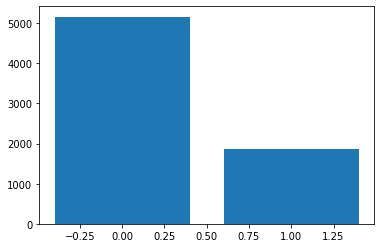

In [65]:
# Quick data visualisation 
churn = df['Churn'].value_counts()
# visualization of churn and not churn
plt.bar(range(len(churn)), churn)
plt.show()

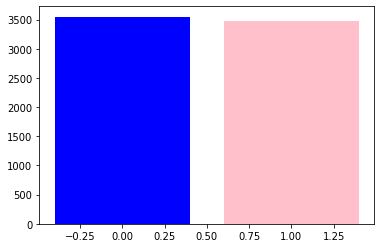

In [66]:
gender = df['gender'].value_counts()
# visualization of churn and not churn
plt.bar(range(len(gender)), gender, color=['blue', 'pink'])
plt.show()

In [67]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 


## Train Test Split

In [69]:
# X value drops "Churn" and y values selects everything but Churn
X = df.drop(columns='Churn')
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((5625, 19), (1407, 19))

In [70]:
y.value_counts(normalize=True)

0    0.734215
1    0.265785
Name: Churn, dtype: float64

In [71]:
y_train.value_counts(normalize=True)

0    0.734222
1    0.265778
Name: Churn, dtype: float64

class imbalance in our target, about 73% 

DummyClassifier(strategy='most_frequent')

In [72]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6030,1,0,0,0,43,0,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,1,Bank transfer (automatic),49,2076.20
3410,0,0,0,0,3,1,No,DSL,No,No,No,No,Yes,No,Month-to-month,0,Credit card (automatic),53,188.70
5483,1,0,1,0,55,1,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,77,4458.15
5524,0,0,1,1,45,1,No,DSL,Yes,No,No,Yes,No,No,Two year,0,Bank transfer (automatic),54,2553.70
6337,1,0,1,1,55,1,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,One year,0,Mailed check,100,5448.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,0,0,0,0,3,1,Yes,DSL,No,No,No,No,No,No,Month-to-month,0,Bank transfer (automatic),50,137.25
5199,1,0,0,0,51,1,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,1,Electronic check,111,5703.25
5235,0,0,0,0,9,1,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,81,784.45
5399,1,0,0,0,50,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,0,Bank transfer (automatic),19,989.05


In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 6030 to 862
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5625 non-null   int64  
 1   SeniorCitizen     5625 non-null   int64  
 2   Partner           5625 non-null   int64  
 3   Dependents        5625 non-null   int64  
 4   tenure            5625 non-null   int64  
 5   PhoneService      5625 non-null   int64  
 6   MultipleLines     5625 non-null   object 
 7   InternetService   5625 non-null   object 
 8   OnlineSecurity    5625 non-null   object 
 9   OnlineBackup      5625 non-null   object 
 10  DeviceProtection  5625 non-null   object 
 11  TechSupport       5625 non-null   object 
 12  StreamingTV       5625 non-null   object 
 13  StreamingMovies   5625 non-null   object 
 14  Contract          5625 non-null   object 
 15  PaperlessBilling  5625 non-null   int64  
 16  PaymentMethod     5625 non-null   object

In [74]:
# OneHotEncoded the columns that included yes/no/no internet service
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [75]:
from sklearn.compose import make_column_transformer 

In [76]:
column_trans = make_column_transformer((StandardScaler(), ['tenure', 'TotalCharges', 'MonthlyCharges']), 
                                       (ohe, ['MultipleLines', 'InternetService', 'OnlineSecurity', 
                                              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                                              'StreamingMovies', 'Contract', 'PaymentMethod']), remainder='passthrough')

In [77]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 ['tenure', 'TotalCharges', 'MonthlyCharges']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['MultipleLines', 'InternetService',
                                  'OnlineSecurity', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'StreamingTV', 'StreamingMovies', 'Contract',
                                  'PaymentMethod'])])

In [78]:
column_trans.fit_transform(X_train)

array([[ 0.43467403, -0.08790784, -0.50473651, ...,  0.        ,
         0.        ,  1.        ],
       [-1.19565249, -0.92128463, -0.37217159, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.92377199,  0.96378055,  0.42321792, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [-0.95110351, -0.65824663,  0.55578284, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.71998118, -0.56791079, -1.4989734 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.50276372, -0.35842967,  0.290653  , ...,  0.        ,
         1.        ,  1.        ]])

Make a simple model (dummy)

#### Logistic Regression

In [79]:
logreg = LogisticRegression(random_state=42)

In [80]:
# Started a pipeline
pipe = make_pipeline(column_trans, logreg)

In [81]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['tenure', 'TotalCharges',
                                                   'MonthlyCharges']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                      

In [82]:
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

0.8062222222222222

In [83]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['tenure', 'TotalCharges',
                                                   'MonthlyCharges']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                      

In [84]:
pipe.score(X_train, y_train)

0.8088888888888889

These values are almost identical so it would not be a lot of help to do gridsearch. It is better to focus on another

#### KNN

In [45]:
knn_model = KNeighborsClassifier(n_neighbors=5)
pipe_knn = make_pipeline(column_trans, knn_model)

cross_val_score(pipe_knn, X_train, y_train, cv=5, scoring='accuracy').mean()

0.7740444444444444

In [47]:
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['tenure', 'TotalCharges',
                                                   'MonthlyCharges']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                      

In [48]:
pipe_knn.score(X_train, y_train)

0.8391111111111111

## Random Forest

In [86]:
rf = RandomForestClassifier()
pipe_forest = make_pipeline(column_trans, rf)

cross_val_score(pipe_forest, X_train, y_train, cv=5, scoring='accuracy').mean()

0.7930666666666667

In [89]:
pipe_forest

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['tenure', 'TotalCharges',
                                                   'MonthlyCharges']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                      

In [90]:
pipe_forest.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['tenure', 'TotalCharges',
                                                   'MonthlyCharges']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                      

In [91]:
pipe_forest.score(X_train, y_train)

0.9976888888888888

we can see that the score is way higher than the fit so it means that it's overfitting. 

In [93]:
pipe_forest.named_steps['columntransformer']

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 ['tenure', 'TotalCharges', 'MonthlyCharges']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['MultipleLines', 'InternetService',
                                  'OnlineSecurity', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'StreamingTV', 'StreamingMovies', 'Contract',
                                  'PaymentMethod'])])

In [99]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Grid Search

In [112]:
# Grid Searching with n_jobs
grid = {'columntransformer__onehotencoder__handle_unknown': ['ignore', 'error'],
        'randomforestclassifier__n_estimators': [500, 600, 700, 800, 900, 1000],
        'randomforestclassifier__max_depth': [17, 18, 19, 20, 21, 22, 23],
        'randomforestclassifier__min_samples_split': [15, 20, 25],
        'randomforestclassifier__min_samples_leaf': [5, 10, 15]
       }

# Instantiate the grid search
gs_rfc = GridSearchCV(pipe_forest, param_grid=grid, cv=5, verbose=3)

# Fit the grid search to the data
gs_rfc.fit(X_train, y_train)


Fitting 5 folds for each of 756 candidates, totalling 3780 fits
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.810, total=   3.1s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.809, total=   2.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.7s remaining:    0.0s


[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.786, total=   2.5s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.803, total=   2.4s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.816, total=   3.8s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.808, total=   3.8s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.812, total=   3.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.788, total=   2.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.803, total=   4.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.817, total=   4.1s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  columntra

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.808, total=   4.5s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.808, total=   3.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.782, total=   4.4s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.801, total=   4.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700, score=0.820, total=   3.2s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.804, total=   3.5s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500, score=0.807, total=   3.2s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500, score=0.788, total=   2.5s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800, score=0.804, total=   3.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800, score=0.820, total=   4.8s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.808, total=   3.0s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.805, total=   2.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900, score=0.788, total=   4.1s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900, score=0.802, total=   3.7s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600, score=0.818, total=   2.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700, score=0.804, total=   2.8s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000, score=0.811, total=   3.7s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000, score=0.782, total=   3.5s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000 
[CV]  co

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700, score=0.804, total=   2.5s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700, score=0.819, total=   2.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500, score=0.806, total=   1.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500, score=0.808, total=   2.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800, score=0.785, total=   2.5s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800, score=0.801, total=   2.5s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.819, total=   1.7s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600, score=0.811, total=   2.1s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.812, total=   3.0s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.789, total=   3.2s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.800, total=   2.0s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.819, total=   2.0s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000, score=0.807, total=   3.4s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000, score=0.812, total=   3.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.784, total=   2.4s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.798, total=   2.2s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.819, total=   3.2s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.806, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.809, total=   2.5s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.788, total=   2.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500, score=0.802, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500, score=0.819, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.810, total=   2.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.811, total=   2.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.788, total=   1.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.803, total=   1.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900, score=0.820, total=   2.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.808, total=   3.1s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  col

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700, score=0.805, total=   2.2s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700, score=0.785, total=   2.1s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000, score=0.803, total=   3.0s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000, score=0.817, total=   3.1s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500 
[CV]  col

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800, score=0.806, total=   2.5s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800, score=0.806, total=   2.4s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500, score=0.784, total=   1.5s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500, score=0.804, total=   1.5s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800, score=0.820, total=   2.5s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900, score=0.806, total=   2.8s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600, score=0.810, total=   2.0s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600, score=0.789, total=   2.1s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.803, total=   3.0s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.815, total=   3.0s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000 
[CV]  columntra

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700, score=0.806, total=   2.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700, score=0.810, total=   2.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000, score=0.786, total=   3.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000, score=0.802, total=   3.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.817, total=   2.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800, score=0.808, total=   2.7s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.808, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.786, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.802, total=   2.5s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.821, total=   2.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.812, total=   1.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.808, total=   1.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.788, total=   2.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.802, total=   2.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.820, total=   1.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.805, total=   2.2s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.807, total=   3.1s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.785, total=   3.1s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  co

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700, score=0.801, total=   2.1s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700, score=0.819, total=   2.2s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500, score=0.807, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500, score=0.807, total=   1.5s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800, score=0.782, total=   3.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800, score=0.799, total=   2.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500, score=0.817, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.804, total=   1.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900, score=0.808, total=   2.8s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900, score=0.787, total=   2.8s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600, score=0.801, total=   2.0s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600, score=0.812, total=   2.0s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000, score=0.808, total=   4.0s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000, score=0.810, total=   3.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700, score=0.789, total=   2.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700, score=0.800, total=   2.4s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000, score=0.817, total=   3.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500, score=0.804, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500 
[CV]  columntra

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800, score=0.810, total=   3.1s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800, score=0.788, total=   2.7s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.799, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.819, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.804, total=   2.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.809, total=   2.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.787, total=   1.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.804, total=   1.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.819, total=   2.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000, score=0.810, total=   4.4s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  col

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.809, total=   2.2s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.786, total=   2.2s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.803, total=   4.2s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.820, total=   3.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  col

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.805, total=   2.4s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.809, total=   2.5s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500, score=0.783, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500, score=0.801, total=   1.5s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800, score=0.819, total=   2.4s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.804, total=   2.7s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.809, total=   1.8s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.786, total=   1.8s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900, score=0.800, total=   2.8s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900, score=0.821, total=   2.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  colum

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700, score=0.809, total=   2.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700, score=0.814, total=   2.4s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000, score=0.789, total=   3.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000, score=0.803, total=   3.4s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700, score=0.818, total=   2.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800, score=0.811, total=   2.7s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500, score=0.807, total=   1.8s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500, score=0.789, total=   1.7s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800, score=0.801, total=   2.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800, score=0.820, total=   2.7s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600, score=0.808, total=   2.0s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600, score=0.807, total=   2.0s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.784, total=   3.1s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.800, total=   3.0s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.820, total=   1.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700, score=0.811, total=   2.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000, score=0.807, total=   3.2s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000, score=0.788, total=   3.2s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  co

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.803, total=   2.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.819, total=   2.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.804, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.808, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.787, total=   2.5s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.803, total=   2.4s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500, score=0.821, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.806, total=   1.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.808, total=   2.7s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.786, total=   2.7s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.801, total=   1.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.818, total=   1.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.804, total=   3.1s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.809, total=   3.0s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  co

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700, score=0.790, total=   2.4s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700, score=0.798, total=   2.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000, score=0.812, total=   3.4s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500, score=0.812, total=   1.7s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500 
[CV]  columntra

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800, score=0.812, total=   2.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800, score=0.788, total=   2.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500, score=0.804, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500, score=0.818, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900, score=0.810, total=   2.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900, score=0.809, total=   2.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600, score=0.784, total=   1.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600, score=0.799, total=   1.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.818, total=   2.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000, score=0.807, total=   3.2s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000 
[CV]  col

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700, score=0.807, total=   2.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700, score=0.784, total=   2.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000, score=0.800, total=   3.2s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000, score=0.820, total=   3.2s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500 
[CV]  col

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800, score=0.808, total=   2.5s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800, score=0.809, total=   2.5s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.781, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.804, total=   1.5s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.820, total=   2.5s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.808, total=   2.7s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.808, total=   1.8s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.787, total=   1.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.803, total=   2.7s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.820, total=   2.8s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  colum

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.804, total=   2.2s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.806, total=   2.1s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.784, total=   3.1s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.805, total=   3.1s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  co

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700, score=0.812, total=   5.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.810, total=   5.4s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500, score=0.810, total=   1.7s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500, score=0.788, total=   1.8s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800, score=0.803, total=   2.7s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800, score=0.816, total=   2.7s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.806, total=   2.1s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.811, total=   2.0s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900, score=0.789, total=   3.0s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900, score=0.804, total=   3.0s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600, score=0.818, total=   2.0s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700, score=0.807, total=   2.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000, score=0.810, total=   3.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000, score=0.784, total=   3.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000 
[CV]  co

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700, score=0.798, total=   2.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700, score=0.822, total=   2.3s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500, score=0.808, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500, score=0.806, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800, score=0.787, total=   2.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800, score=0.800, total=   2.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.819, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600, score=0.804, total=   1.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.809, total=   2.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.783, total=   2.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.804, total=   1.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.817, total=   1.9s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000, score=0.807, total=   3.2s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000, score=0.806, total=   3.2s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  co

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.786, total=   2.2s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.802, total=   2.2s
[CV] columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=ignore, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.819, total=   3.2s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.809, total=   1.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  columntrans

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.811, total=   2.8s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.788, total=   2.8s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500, score=0.801, total=   1.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500, score=0.816, total=   1.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.807, total=   3.1s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.810, total=   3.1s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.784, total=   2.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.804, total=   2.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900, score=0.819, total=   3.2s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.807, total=   3.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  columntrans

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700, score=0.807, total=   2.3s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700, score=0.786, total=   2.3s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000, score=0.803, total=   3.3s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000, score=0.820, total=   3.3s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500 
[CV]  columnt

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800, score=0.809, total=   2.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800, score=0.806, total=   2.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500, score=0.787, total=   1.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500, score=0.804, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800, score=0.815, total=   2.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900, score=0.810, total=   3.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600, score=0.808, total=   1.9s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600, score=0.788, total=   1.9s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.801, total=   2.9s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.819, total=   3.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000 
[CV]  columntra

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700, score=0.803, total=   2.2s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700, score=0.808, total=   2.2s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000, score=0.786, total=   3.3s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000, score=0.803, total=   3.2s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.818, total=   2.3s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800, score=0.804, total=   2.5s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.810, total=   1.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.791, total=   1.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.803, total=   2.8s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.814, total=   2.8s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.810, total=   2.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.809, total=   2.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.790, total=   3.1s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.802, total=   3.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.818, total=   2.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.806, total=   2.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.808, total=   3.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.788, total=   3.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700, score=0.803, total=   3.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700, score=0.819, total=   2.3s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500, score=0.805, total=   1.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500, score=0.808, total=   1.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800, score=0.788, total=   2.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800, score=0.802, total=   2.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500, score=0.820, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.805, total=   2.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900, score=0.808, total=   3.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900, score=0.787, total=   2.9s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600, score=0.801, total=   1.9s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600, score=0.820, total=   1.9s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000, score=0.807, total=   3.2s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000, score=0.806, total=   3.2s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700, score=0.782, total=   2.2s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700, score=0.801, total=   2.3s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000, score=0.820, total=   3.2s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500, score=0.805, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500 
[CV]  columntra

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800, score=0.806, total=   2.5s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800, score=0.787, total=   2.5s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=18, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.800, total=   1.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.815, total=   1.8s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.808, total=   3.1s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.810, total=   3.1s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.788, total=   2.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.800, total=   2.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.818, total=   3.1s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000, score=0.806, total=   3.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  columntrans

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.811, total=   2.3s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.786, total=   2.5s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.801, total=   3.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.821, total=   3.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.805, total=   2.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.809, total=   2.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500, score=0.784, total=   1.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500, score=0.799, total=   1.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800, score=0.820, total=   2.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.807, total=   3.1s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.809, total=   2.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.786, total=   2.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900, score=0.801, total=   2.9s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900, score=0.818, total=   2.9s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  columntra

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700, score=0.807, total=   2.2s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700, score=0.807, total=   2.2s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000, score=0.783, total=   3.1s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000, score=0.799, total=   3.3s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700, score=0.817, total=   2.2s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800, score=0.804, total=   2.5s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500, score=0.804, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500, score=0.788, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800, score=0.803, total=   2.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800, score=0.820, total=   2.5s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=19, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600, score=0.812, total=   2.1s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600, score=0.809, total=   2.1s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.788, total=   3.1s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.802, total=   3.1s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.815, total=   2.1s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700, score=0.803, total=   2.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000, score=0.813, total=   3.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000, score=0.788, total=   3.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.804, total=   2.3s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.819, total=   2.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.807, total=   1.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.809, total=   1.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.787, total=   2.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.801, total=   2.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500, score=0.815, total=   1.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.807, total=   2.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.809, total=   3.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.786, total=   3.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.802, total=   2.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.820, total=   2.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.806, total=   3.3s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.805, total=   3.3s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700, score=0.784, total=   2.2s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700, score=0.803, total=   2.2s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000, score=0.820, total=   3.2s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500, score=0.807, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500 
[CV]  columntra

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800, score=0.807, total=   2.5s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800, score=0.787, total=   2.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500, score=0.801, total=   1.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500, score=0.820, total=   1.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900, score=0.804, total=   2.8s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900, score=0.808, total=   2.8s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=20, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600, score=0.792, total=   2.1s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600, score=0.805, total=   2.1s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.816, total=   3.2s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000, score=0.813, total=   3.5s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000 
[CV]  columntrans

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700, score=0.812, total=   2.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700, score=0.787, total=   2.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000, score=0.803, total=   3.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000, score=0.817, total=   3.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500 
[CV]  columntrans

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800, score=0.804, total=   2.9s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800, score=0.810, total=   3.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.789, total=   2.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.803, total=   1.8s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.820, total=   3.1s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.805, total=   4.5s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.808, total=   3.1s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.788, total=   2.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.801, total=   3.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.818, total=   3.8s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  columntra

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.807, total=   2.9s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.807, total=   2.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.783, total=   3.8s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.800, total=   4.1s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700, score=0.819, total=   2.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.806, total=   2.8s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500, score=0.809, total=   1.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500, score=0.788, total=   1.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800, score=0.803, total=   3.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800, score=0.816, total=   3.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.807, total=   2.8s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.808, total=   2.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900, score=0.788, total=   3.1s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900, score=0.802, total=   3.5s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=21, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600, score=0.813, total=   2.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700, score=0.811, total=   2.8s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000, score=0.812, total=   3.8s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000, score=0.786, total=   3.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700, score=0.798, total=   2.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700, score=0.817, total=   2.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500, score=0.808, total=   1.8s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500, score=0.810, total=   1.8s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800, score=0.788, total=   3.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800, score=0.801, total=   3.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.818, total=   1.8s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600, score=0.809, total=   2.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.808, total=   3.5s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.785, total=   3.9s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.802, total=   2.1s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.819, total=   2.2s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000, score=0.806, total=   8.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000, score=0.806, total=   3.9s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.786, total=   3.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.800, total=   4.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.820, total=   7.5s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.804, total=   3.1s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  columntra

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.809, total=   4.2s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.784, total=   3.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500, score=0.798, total=   2.1s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500, score=0.818, total=   2.2s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.804, total=   3.8s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.811, total=   3.5s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.787, total=   2.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.803, total=   3.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900, score=0.820, total=   3.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.805, total=   4.1s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=22, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  columnt

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700, score=0.810, total=   3.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700, score=0.793, total=   4.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=700 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000, score=0.804, total=   5.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000, score=0.813, total=   4.8s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=500 
[CV]  columntrans

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800, score=0.805, total=   3.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800, score=0.812, total=   3.5s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=800 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500, score=0.780, total=   3.2s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500, score=0.799, total=   2.5s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=500 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800, score=0.818, total=   3.8s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900, score=0.808, total=   3.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=900 
[CV]  columntransfor

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600, score=0.810, total=   2.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600, score=0.787, total=   2.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=600 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.803, total=   3.9s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900, score=0.820, total=   3.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=1000 
[CV]  columntra

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700, score=0.811, total=   5.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700, score=0.807, total=   5.3s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=700 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000, score=0.786, total=   3.7s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000, score=0.801, total=   3.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=1000 
[CV]  column

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.821, total=   2.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800, score=0.806, total=   2.6s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=10, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=800 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.812, total=   1.5s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500, score=0.784, total=   1.5s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=500 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.804, total=   2.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=800, score=0.821, total=   2.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=15, randomforestclassifier__n_estimators=900 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.805, total=   1.9s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600, score=0.807, total=   2.2s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=600 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.787, total=   2.9s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900, score=0.802, total=   2.9s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=20, randomforestclassifier__n_estimators=900 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=600, score=0.819, total=   2.1s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700, score=0.803, total=   2.4s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=700 
[CV]  columntran

[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.809, total=   3.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000, score=0.780, total=   3.0s
[CV] columntransformer__onehotencoder__handle_unknown=error, randomforestclassifier__max_depth=23, randomforestclassifier__min_samples_leaf=15, randomforestclassifier__min_samples_split=25, randomforestclassifier__n_estimators=1000 
[CV]  column

[Parallel(n_jobs=1)]: Done 3780 out of 3780 | elapsed: 169.7min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['tenure',
                                                                          'TotalCharges',
                                                                          'MonthlyCharges']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Multiple

#### First run

In [106]:
gs_rfc.best_params_

{'columntransformer__onehotencoder__handle_unknown': 'ignore',
 'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__min_samples_split': 10,
 'randomforestclassifier__n_estimators': 30}

In [107]:
gs_rfc.best_score_

0.8032

#### Second Run

In [110]:
gs_rfc.best_params_

{'columntransformer__onehotencoder__handle_unknown': 'ignore',
 'randomforestclassifier__max_depth': 20,
 'randomforestclassifier__min_samples_split': 15,
 'randomforestclassifier__n_estimators': 1000}

In [111]:
gs_rfc.best_score_

0.8074666666666666

#### Third Run 

In [113]:
gs_rfc.best_params_

{'columntransformer__onehotencoder__handle_unknown': 'ignore',
 'randomforestclassifier__max_depth': 22,
 'randomforestclassifier__min_samples_leaf': 5,
 'randomforestclassifier__min_samples_split': 25,
 'randomforestclassifier__n_estimators': 900}

In [114]:
gs_rfc.best_score_

0.8072888888888888

#### Grid search for KNN

In [98]:
# Grid Searching with n_jobs
# THIS IS FROM LECTUREEEEE 
grid = {'ct__subpipe_num__num_impute__strategy': ['mean', 'median', 'mode'],
        'rfc__max_depth': [3, 5, 7], 
        'rfc__n_estimators': [50, 100],
        'rfc__min_samples_leaf': [1, 3, 5]}

gs_rfc = GridSearchCV(rfc_model_pipe, param_grid=grid, cv=5, verbose=3)

In [148]:
gs = GridSearchCV(estimator=knn_model, param_grid=grid, cv=5)

In [150]:
pipe_grid = make_pipeline(column_trans, knn)

In [151]:
cross_val_score(pipe_grid, X_train, y_train, cv=5, scoring='accuracy').mean()

0.7733333333333332

In [ ]:
#### Grid search for KNN

# Define the parameter grid
grid = {
    'n_neighbors': [1, 3, 5],
    'metric': ['minkowski', 'manhattan'],
    'weights': ['uniform', 'distance']   
}

gs = GridSearchCV(estimator=knn_model, param_grid=grid, cv=5)

pipe_grid = make_pipeline(column_trans, gs)

cross_val_score(pipe_grid, X_train, y_train, cv=5, scoring='accuracy').mean()

Grid search: hyper parameter tunning but many at the same time

boosting can also help